In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


# Load the dataset
file_path = '/content/sample_data/spam.csv'
spam_data = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset
print(spam_data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Print the existing column names of the DataFrame
print(spam_data.columns)

# Drop only the columns that are actually present
spam_data = spam_data.drop(columns=[col for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col in spam_data.columns])

# Rename the columns for clarity
spam_data.columns = ['label', 'message']

# Check the distribution of labels
print(spam_data['label'].value_counts())

Index(['label', 'message'], dtype='object')
label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# Split the data into features (X) and labels (y)
X = spam_data['message']
y = spam_data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vect = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vect = vectorizer.transform(X_test)


In [ ]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_vect, y_train)


MultinomialNB()

In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test_vect)


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[963   2]
 [ 16 134]]


In [ ]:
# Example new messages
new_messages = ["Congratulations! You've won a $1,000 Walmart gift card.",
                "Meeting at 10 AM tomorrow."]

# Transform the new messages
new_messages_vect = vectorizer.transform(new_messages)

# Make predictions
predictions = nb_model.predict(new_messages_vect)

# Display predictions
for msg, pred in zip(new_messages, predictions):
    print(f"Message: '{msg}' - Predicted as: {pred}")


Message: 'Congratulations! You've won a $1,000 Walmart gift card.' - Predicted as: spam
Message: 'Meeting at 10 AM tomorrow.' - Predicted as: ham


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Distribution of spam and ham messages
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=data, palette='Set2')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualization: Word cloud of spam messages
from wordcloud import WordCloud

# Create a word cloud for spam messages
spam_messages = ' '.join(data[data['Label'] == 'spam']['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()


ValueError: Could not interpret value `Label` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [ ]:
print(spam_data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


label
ham     4825
spam     747
Name: count, dtype: int64
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[963   2]
 [ 16 134]]


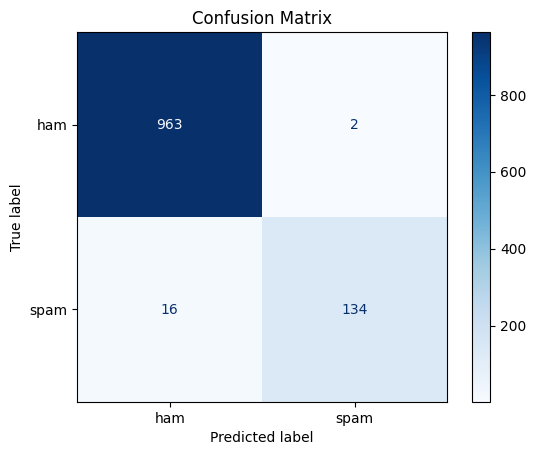

Message: 'Congratulations! You've won a $1,000 Walmart gift card.' - Predicted as: spam
Message: 'Meeting at 10 AM tomorrow.' - Predicted as: ham


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/spam.csv'
spam_data = pd.read_csv(file_path, encoding='latin-1')

# Drop unnecessary columns and rename for clarity
spam_data = spam_data.drop(columns=[col for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col in spam_data.columns])
spam_data.columns = ['label', 'message']

# Check the distribution of labels
print(spam_data['label'].value_counts())

# Split the data into features and labels
X = spam_data['message']
y = spam_data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_vect)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Function for real-time spam detection
def predict_spam(message):
    message_vect = vectorizer.transform([message])
    prediction = nb_model.predict(message_vect)
    return prediction[0]

# Example usage
new_message = "Congratulations! You've won a $1,000 Walmart gift card."
print(f"Message: '{new_message}' - Predicted as: {predict_spam(new_message)}")

new_message2 = "Meeting at 10 AM tomorrow."
print(f"Message: '{new_message2}' - Predicted as: {predict_spam(new_message2)}")


label
ham     4825
spam     747
Name: count, dtype: int64


<ipython-input-22-dbed0d0f7d37>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=spam_data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


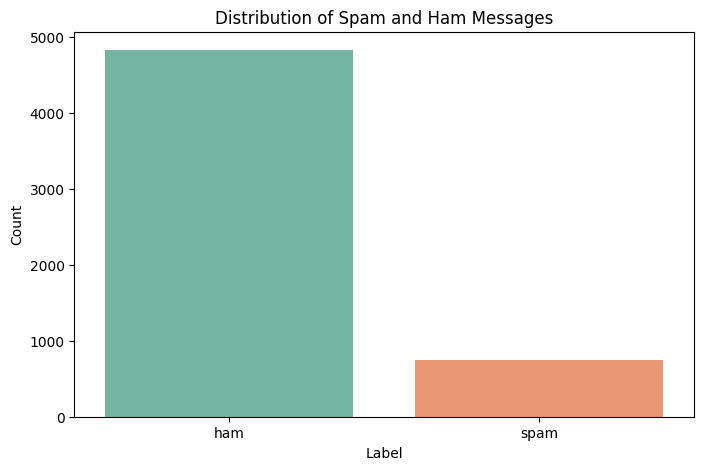

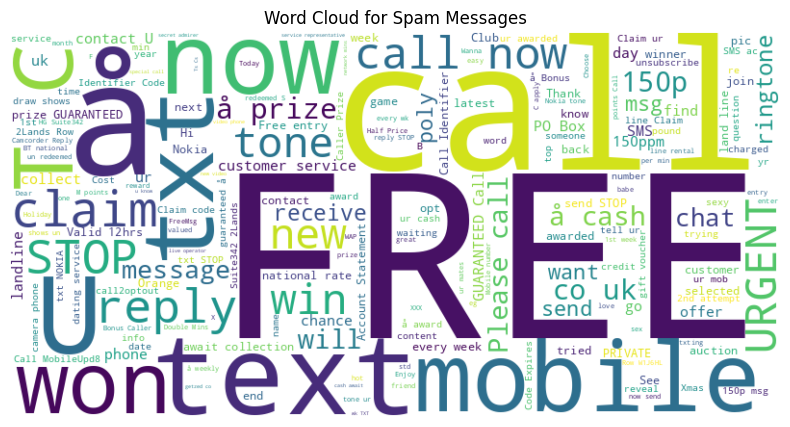

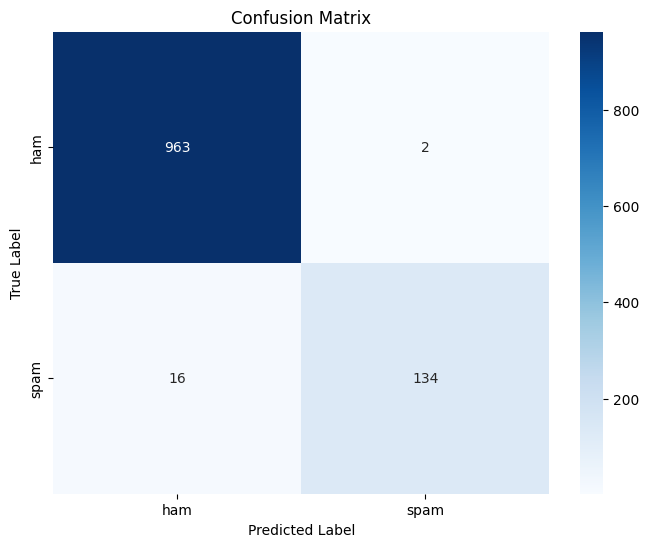

<Figure size 1000x600 with 0 Axes>

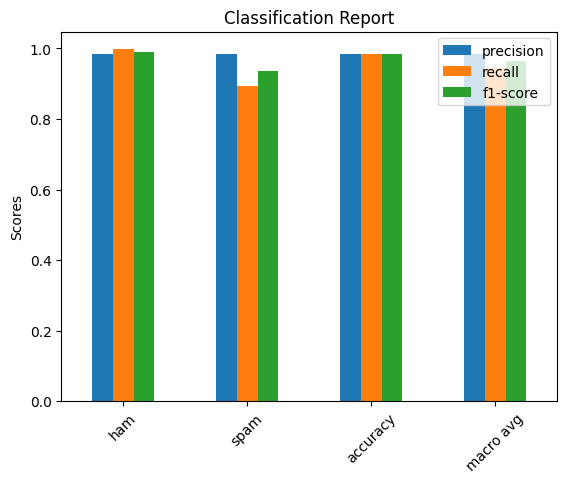

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

# Load the dataset
file_path = '/content/sample_data/spam.csv'
spam_data = pd.read_csv(file_path, encoding='latin-1')

# Drop unnecessary columns and rename for clarity
spam_data = spam_data.drop(columns=[col for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col in spam_data.columns])
spam_data.columns = ['label', 'message']

# Check the distribution of labels
print(spam_data['label'].value_counts())

# Visualization: Distribution of spam and ham messages
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=spam_data, palette='Set2')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Combine all spam messages into a single string for word cloud
spam_words = ' '.join(spam_data[spam_data['label'] == 'spam']['message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud for Spam Messages')
plt.show()

# Split the data into features and labels
X = spam_data['message']
y = spam_data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_vect)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
report_df.iloc[:-1, :3].plot(kind='bar', yerr=report_df.iloc[:-1, 3:], capsize=4)
plt.title('Classification Report')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()
